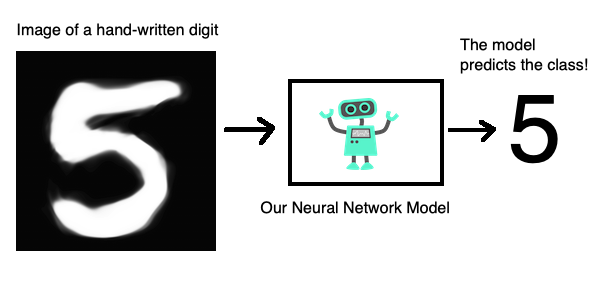

In [1]:
from IPython.display import Image
Image("image/1_1.png")

In [1]:
import tensorflow as tf

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.9.1


# Data Set (import MNIST)

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

# Shapes of Imported Arrays

In [4]:
print("xtrain shape: ", xtrain.shape)
print("ytrain shape: ", ytrain.shape)
print("xtest shape: ", xtest.shape)
print("ytest shape: ", ytest.shape)

xtrain shape:  (60000, 28, 28)
ytrain shape:  (60000,)
xtest shape:  (10000, 28, 28)
ytest shape:  (10000,)


28 rows and 28 columns, so height and width would be 28 pixels.
60000 and 10000 represents the example of training and testing

# Plot an Image Example

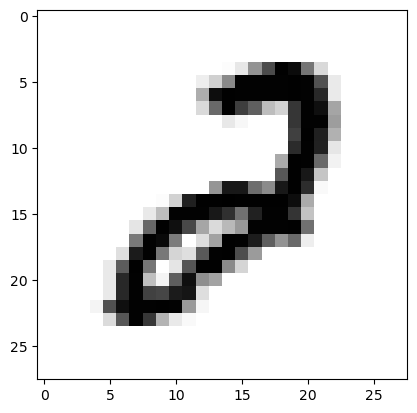

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(xtrain[555], cmap = "binary")
plt.show()

#### can get access of 60000 examples of train data set by putting the index number in xtrain

# Display Labels

In [6]:
ytrain[555]

2

In [7]:
print(set(ytrain))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding

after this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0.

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

# Encoding Labels

In [8]:
from tensorflow.keras.utils import to_categorical

ytrain_encoded = to_categorical(ytrain)
ytest_encoded = to_categorical(ytest)

# Validated Shapes

In [9]:
print("ytrain encoded shape:", ytrain_encoded.shape)
print("ytest encoded shape:", ytest_encoded.shape)

ytrain encoded shape: (60000, 10)
ytest encoded shape: (10000, 10)


# Display Encoded Labels

In [10]:
ytrain_encoded[7841]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Neural Networks

#### Linear Equations

In [11]:
Image("image/1_2.png")

NameError: name 'Image' is not defined

In [ ]:
Image("image/1_3.png")

# Neural Networks

In [ ]:
Image("image/1_4.png")

# Preprocessing the Examples
#### Unrolling N-dimensional Arrays to Vectors

In [12]:
import numpy as np

In [13]:
xtrain_reshape = np.reshape(xtrain, (60000, 784)) # 28 row * 28 columns = 784
xtest_reshape = np.reshape(xtest, (10000, 784))

print("xtrain reshape shape:", xtrain_reshape.shape)
print("xtest reshape shape:", xtest_reshape.shape)

xtrain reshape shape: (60000, 784)
xtest reshape shape: (10000, 784)


### Display Pixel Values

In [14]:
print(set(xtrain_reshape[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [15]:
xmean = np.mean(xtrain_reshape)
xstd = np.std(xtrain_reshape)

epsilon = 1e-10

xtrain_norm = (xtrain_reshape - xmean) / (xstd + epsilon)
xtest_norm = (xtest_reshape - xmean) / (xstd + epsilon)

In [16]:
xmean

33.318421449829934

In [17]:
xstd

78.56748998339798

In [18]:
print(set(xtrain_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Creating a Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(128, activation = "relu", input_shape = (784,)),
    Dense(128, activation = "relu"),
    Dense(10, activation = "softmax")
    
])

In [ ]:
Image("image/1_5.png")

## Compiling the Model

In [ ]:
model.compile(
    optimizer = "sgd",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

model.summary()

# Training the Model

In [ ]:
model.fit(xtrain_norm, ytrain_encoded, epochs = 5)

### Evaluating the Model

In [ ]:
loss, accuracy = model.evaluate(xtest_norm, ytest_encoded)
print("Testing set accuracy", accuracy * 100)

# Predictions

In [ ]:
predict = model.predict(xtest_norm)
print("Shape of Prediction:", predict.shape)

### Plotting the results

In [ ]:
import numpy as np

In [ ]:
plt.figure(figsize = (8, 8))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    predict = np.argmax(predict[start_index + i])
    gt = ytest[start_index + i]
    
    col = "g"
    if predict != gt:
        col = "r"
    
    plt.xlabel("i={}, predict={}, gt={}".format(start_index + i, predict, gt))
    plt.imshow(xtest[start_index + i], cmap = "binary")
    
plt.show()